# Topics of Sociability and Solidarity in Recollections of *All* Survivors of Auschwitz-Birkenau

### Research Questions:

- If one watches testimonies of Birkenau survivors for long, what is the probability that she hears survivors speaking about solidarity and sociability? Are they frequent and recurrent elements of survivors' recollections? Or are they rare topics and survivors rather focus their attention on other topics?
- Compared to the probability of other rare or frequent events in Birkenau, are topics related to solidarity and sociability more or less probable in the narration of survivors?

## Load the relevant data

Load the libraries needed to work with the data

In [1]:
import constants
import pandas as pd
import os
from IPython.display import display

Set up the paths to data

In [2]:
input_directory = constants.output_data_markov_modelling

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

Load the stationary probability of different topics in the recollections of survivors

In [3]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

Use the line below for normalization

In [4]:
#p_complete['stationary_prob'] = p_complete[p_complete.topic_name=='living conditions']['stationary_prob'].values[0] / p_complete['stationary_prob']

Show the 25 most significant topics

In [47]:
display(p_complete[0:25])

,Unnamed: 0,topic_name,stationary_prob
0,0,living conditions,0.082668
1,1,transfer,0.068331
2,2,selections,0.054011
3,3,departure,0.053407
4,4,camp intake procedures,0.040847
5,5,forced labor,0.038220
6,6,food and thirst,0.034989
7,7,mass murder awareness,0.030954
8,8,camp population,0.029836
9,9,adaptation methods,0.029109


## Identify relevant topics

### Identify the facto significant and everyday events

Identify "selection"

In [7]:
selection = p_complete[p_complete.topic_name=='selections']['stationary_prob'].values[0]

Identify "Appell"

In [8]:
Appell = p_complete[p_complete.topic_name=='Appell']['stationary_prob'].values[0]

Identify "clothes"

In [9]:
clothes = p_complete[p_complete.topic_name=='clothing']['stationary_prob'].values[0]

Identify "tattoo"

In [10]:
tattoo = p_complete[p_complete.topic_name=='tattoo']['stationary_prob'].values[0]

### Identify the facto rare events

In [11]:
escapes = p_complete[p_complete.topic_name=='escapes']['stationary_prob'].values[0]

### Identify topics related to sociability

Identify the topic relating to social relations

In [12]:
social_bonds = p_complete[p_complete.topic_name=='social bonds']['stationary_prob'].values[0]

Identify the topic relating to family

In [13]:
family = p_complete[p_complete.topic_name=='family']['stationary_prob'].values[0]

Identify the topic relating to friends and friendships

In [14]:
#friends = p_complete[p_complete.topic_name=='friends']['stationary_prob'].values[0]

### Identify topics related to acts of solidarity

In [15]:
aid_giving = p_complete[p_complete.topic_name=='aid giving']['stationary_prob'].values[0]

In [16]:
#food_sharing = p_complete[p_complete.topic_name=='food sharing']['stationary_prob'].values[0]

In [17]:
preferential_treatment = p_complete[p_complete.topic_name=='preferential treatment']['stationary_prob'].values[0]

In [18]:
warnings = p_complete[p_complete.topic_name=='warnings']['stationary_prob'].values[0]

## Observation 1

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is more probable than "Appell"; yet is the 15th most probable topic. It is therefore part of the upper quartile that contains the most probable topics addressed by survivors.

### Quantitative evidence

In [19]:
print (aid_giving)

0.02353992576055381


In [20]:
print (Appell)

0.01811801166200732


In [21]:
print (aid_giving/Appell)

1.299255470174799


In [22]:
upper_quantile = p_complete.stationary_prob.quantile([0.75]).values[0]
print (upper_quantile)

0.009100856786985804


In [23]:
print (aid_giving>upper_quantile)

True


## Observation 2

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is significantly more probable
(3.7 times) than "Escape".

### Quantitative evidence

In [24]:
print (aid_giving)

0.02353992576055381


In [25]:
print (escapes)

0.006274174797743578


In [26]:
print (aid_giving/escapes)

3.751875986786282


## Observation 3

### Qualitative description:

The topic describing various forms of social activity ("social bonds") is nearly as significant as Appel; it is the 19th most probable topic, and it is also part of the upper quartile. It is also more probable than escapes.

### Quantitative evidence

In [27]:
print (social_bonds)

0.01658180090817184


In [28]:
display(p_complete[3:25])

,Unnamed: 0,topic_name,stationary_prob
3,3,departure,0.053407
4,4,camp intake procedures,0.040847
5,5,forced labor,0.038220
6,6,food and thirst,0.034989
7,7,mass murder awareness,0.030954
8,8,camp population,0.029836
9,9,adaptation methods,0.029109
10,10,family,0.028691
11,11,kapos,0.026288
12,12,transportation,0.025864


In [29]:
print (social_bonds/Appell)

0.9152108530177819


In [30]:
print (Appell/social_bonds)

1.0926443853923251


In [31]:
print (social_bonds>upper_quantile)

True


In [32]:
print (social_bonds/escapes)

2.6428656265896926


## Observation 4

### Qualitative description:

The topic describing sociability is more significant (1.2 times) than memories related to clothes. Similarly, the topic describing acts of solidarity is nearly as significant as memories related to tattoo.

### Quantitative evidence

In [33]:
social_bonds/clothes

1.259556257186346

In [34]:
display(p_complete[p_complete.topic_name=="clothing"])

,Unnamed: 0,topic_name,stationary_prob
24,24,clothing,0.013165


In [35]:
display(p_complete[p_complete.topic_name=="social bonds"])

,Unnamed: 0,topic_name,stationary_prob
18,18,social bonds,0.016582


In [36]:
aid_giving/tattoo

0.9626527488173042

In [37]:
tattoo / aid_giving

1.0387961819343265

In [38]:
display(p_complete[p_complete.topic_name=="aid giving"])

,Unnamed: 0,topic_name,stationary_prob
14,14,aid giving,0.02354


In [39]:
display(p_complete[p_complete.topic_name=="tattoo"])

,Unnamed: 0,topic_name,stationary_prob
13,13,tattoo,0.024453


## Interpretation

In the recollections of survivors of Birkenau, memories related to sociability and acts of solidarity are highly probable and recurrent topics. They do recur in the narrations of many victims independently from each other. Survivors speak about them as often as about other everyday aspects and events of life in Birkenau. This suggests that neither sociability nor acts of solidarity were rare events in Birkenau. If they had been rare and sporadic, survivors would not have addressed them very often in their recollections either. They would discuss these topics as often as topics related to de facto rare events such as for instance escape. 

It is important to underline that survivors were not asked by interviewers to address solidarity and sociability. It was their decision to address these topics. The stationary probability measured above actually describe the overall probability that interviews with survivors go towards these topics. In other words, the significance of solidarity and sociability are given by the fact that they do determine the direction of survivors' narrative.

## Visualization

A word cloud rendering the stationary probability of key topics in recollections of Birkenau survivors. 

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [41]:
#p_complete['stationary_prob_normalized'] = 1/(p_complete[p_complete.topic_name=='living conditions']['stationary_prob'].values[0] / p_complete['stationary_prob']) 
p_complete = p_complete[0:75]
wfreqs = p_complete.set_index('topic_name')['stationary_prob'].to_dict()

In [42]:
def black(word, font_size, position, orientation,
    font_path, random_state):
    if (word =="social bonds") or (word =="aid giving") or (word =="friends") or (word =="food sharing"):
        return 'red'
    elif (word =="tattoo") or (word =="clothing") or (word =="Appell") or (word == "escapes"):
        return 'blue'
    else:
        return 'black'

In [44]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', color_func=black,
                min_font_size = 10).generate_from_frequencies(wfreqs)

In [45]:
wordcloud.font_path

'/miniconda3/lib/python3.7/site-packages/wordcloud/DroidSansMono.ttf'

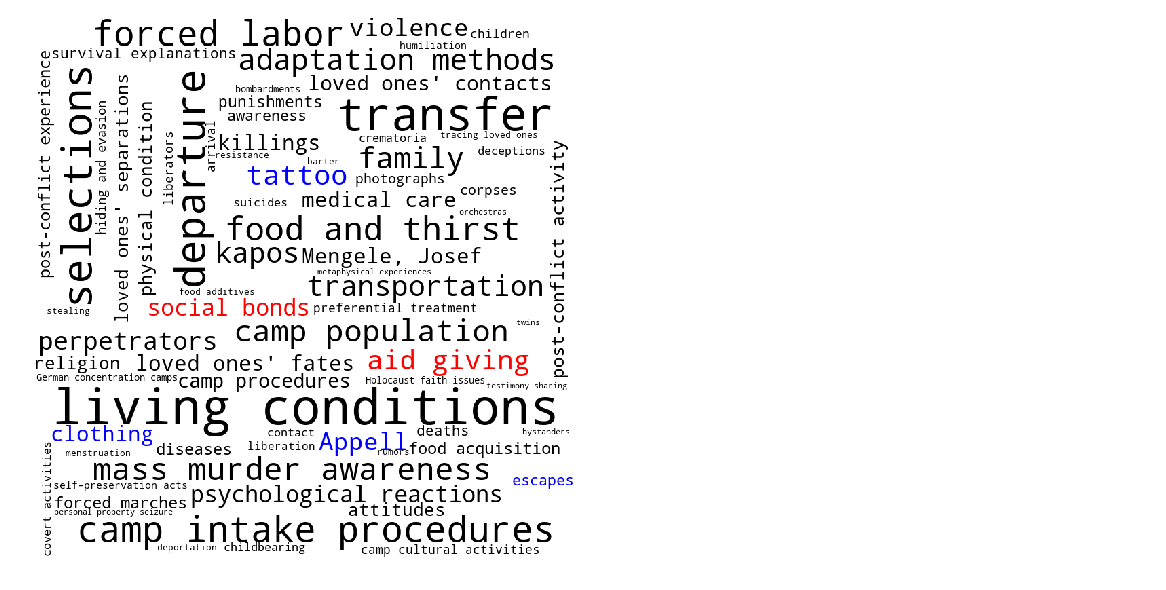

In [46]:
# plot the WordCloud image
fig, ax = plt.subplots(1, 2, figsize=(16, 8), facecolor=None)
 
ax[0].imshow(wordcloud)
for _ax in ax:
    _ax.axis("off") 
plt.tight_layout(pad=0) 